In [1]:
%matplotlib inline

import os
import cmaps
import salem
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
from pylab import rcParams
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from myfunc import timer
from myfunc import DirMan
import config
import matplotlib.font_manager as fm

# configuration
# resolution = "0p1"
resolution = "500"
region = [-180,180,-60,90]
data_path = f'/tera04/zhwei/xionghui/bedrock/run/{resolution}/'
post_data_path = '/tera04/zhwei/xionghui/bedrock/'
shp_path = '/tera04/zhwei/xionghui/bedrock/Shp/'
fig_path = f'/home/xuxh22/stu01/Bedrock/fig/{resolution}/'
path = '/home/xuxh22/stu01/Bedrock/'
if resolution == "0p1":
    size = 0.1
elif resolution == "500":
    size = 0.0005

print('python draw_g2_scatter.py')
print(data_path)
dir_man = DirMan(data_path)
dir_man.enter()
os.makedirs(f'{fig_path}/global_map_2', exist_ok=True)

shp = gpd.GeoDataFrame.from_file(shp_path+'World_CN/ne_10m_admin_0_countries_chn.shp')

pd.set_option('display.max_columns', None)
font = {'family': 'Times New Roman'}
matplotlib.rc('font', **font)

params = {'backend': 'ps',
          'axes.labelsize': 25,
          'grid.linewidth': 0.2,
          'font.size': 25,
          'legend.fontsize': 18,
          'legend.frameon': False,
          'xtick.labelsize': 30,
          'xtick.direction': 'out',
          'ytick.labelsize': 30,
          'ytick.direction': 'out',
          'legend.handlelength': 1,
          'legend.handleheight': 1,
          'savefig.bbox': 'tight',
          'axes.unicode_minus': False,
          "mathtext.default":"regular",
          'text.usetex': False}
rcParams.update(params)

font_properties = fm.FontProperties(weight='bold')

python draw_g2_scatter.py
/tera04/zhwei/xionghui/bedrock/run/500/
Entered /tera04/zhwei/xionghui/bedrock/run/500/


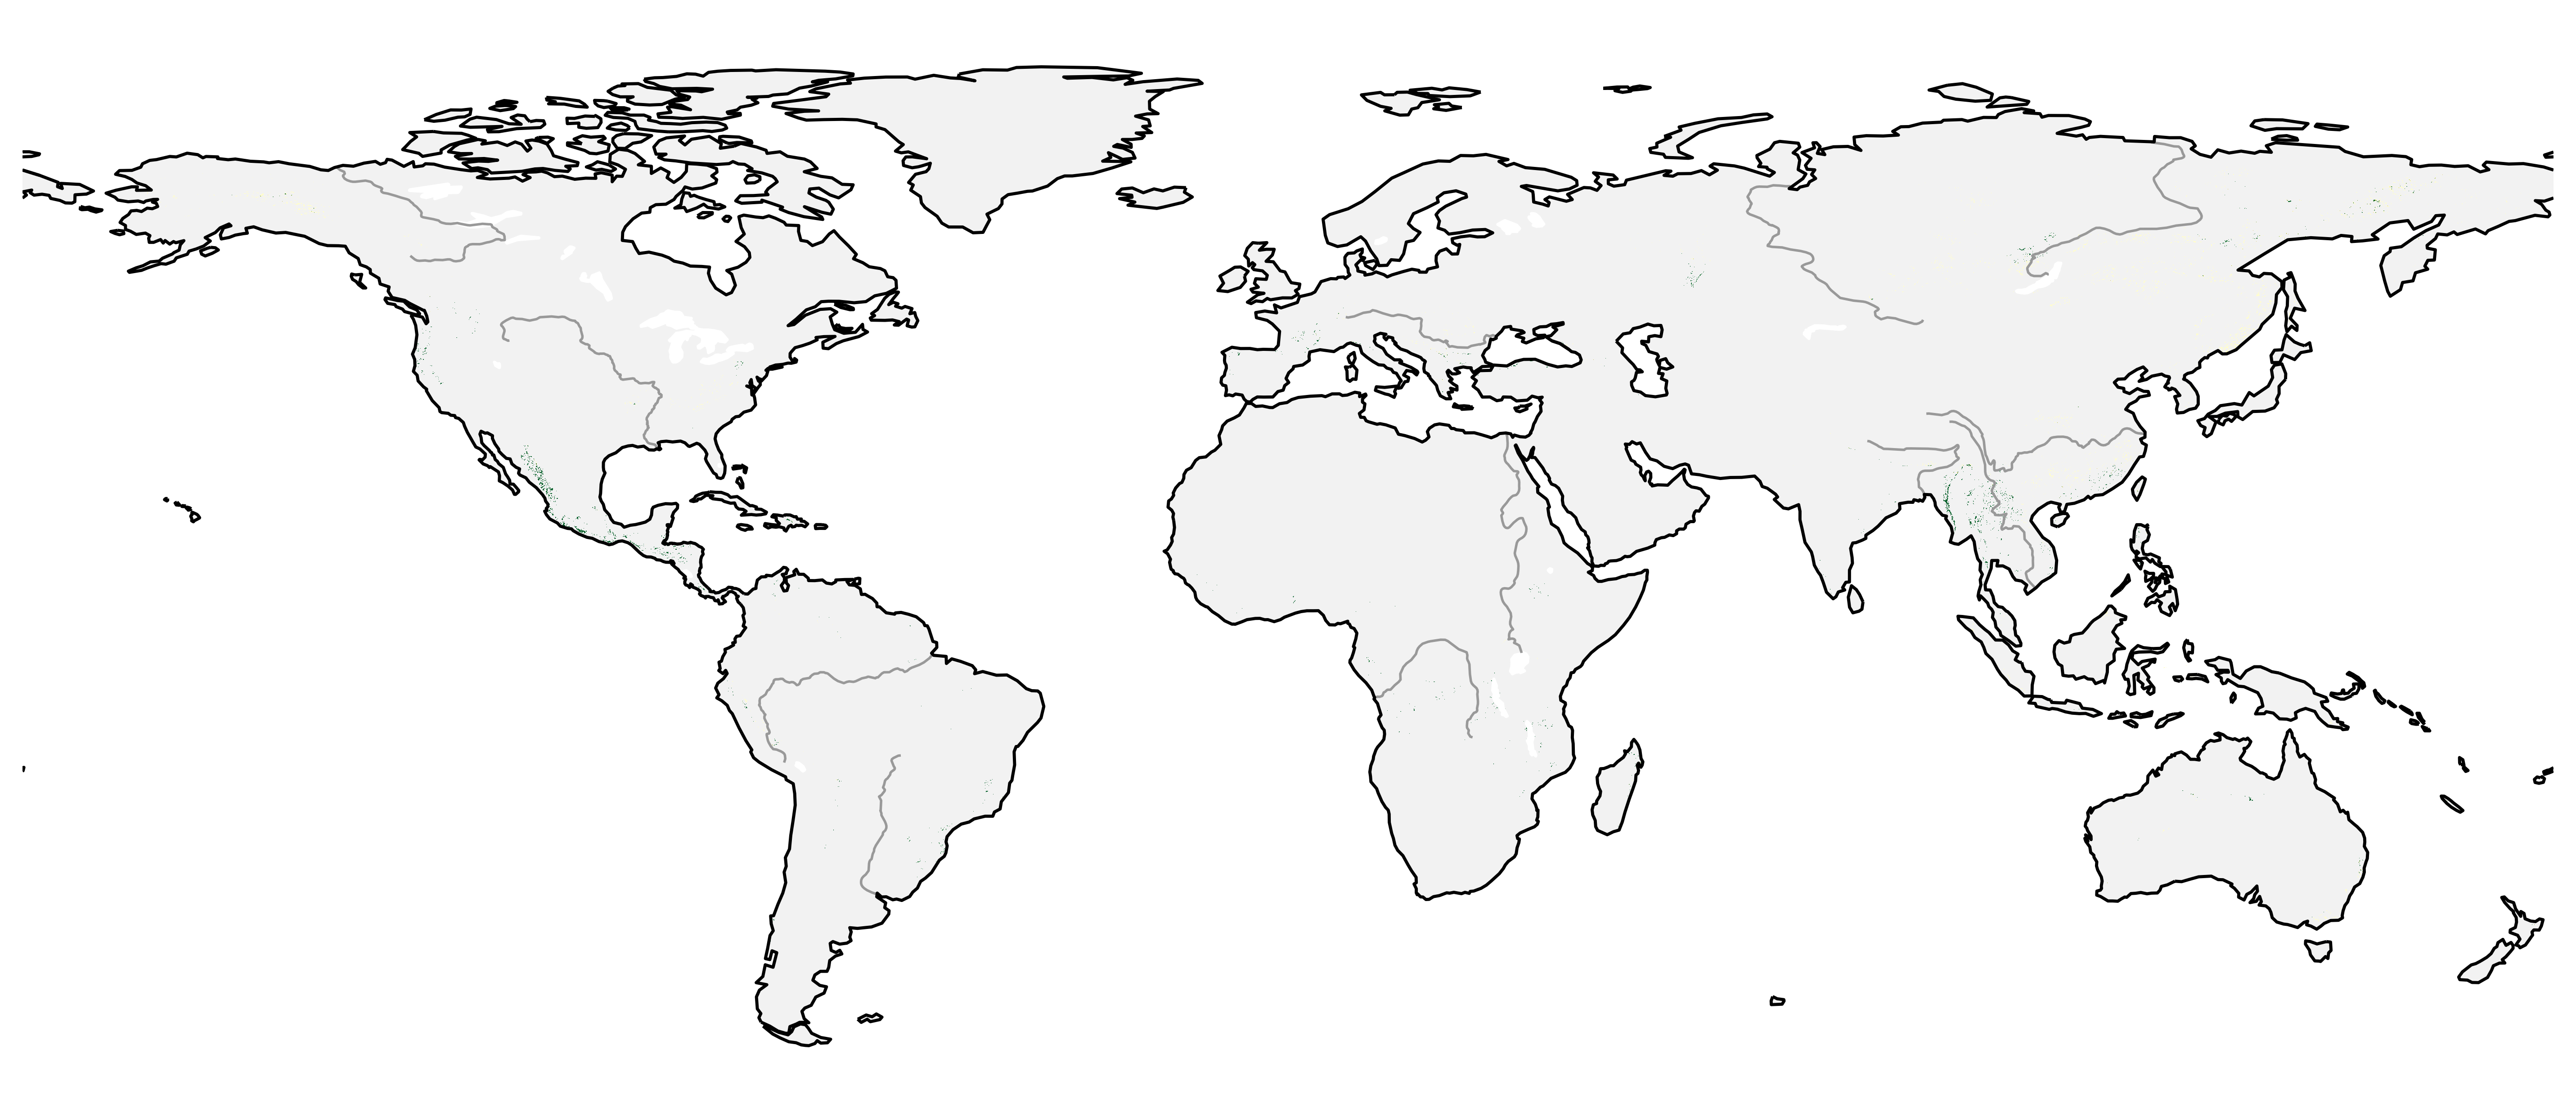

In [2]:
def draw1(name,level,cmap):
    image = xr.open_dataset(f'{data_path}/{name[0]}.nc4').sel(lon=slice(region[0],region[1]),lat=slice(region[2],region[3]))
    s = image[f'{name[1]}']
    s = s.salem.roi(shape=shp)
    image.close()

    # s = np.where(s==0, np.nan, s)    
    # s = np.ma.masked_where(np.isnan(s), s)  

    fig = plt.figure(figsize=(12, 6), dpi=500)

    fig.subplots_adjust(left=0., right=1, 
                    bottom=0, top=1, hspace=0) 
        
    #Create a subgraph grid with 2 rows and 3 columns
    gs = GridSpec(2, 6)
    ax = fig.add_subplot(gs[:, :], projection=ccrs.PlateCarree())

    # Set drawing mode(note:extent's lat from positive to negative)
    img = ax.imshow(s, cmap=cmap,
                    extent=[region[0], region[1], region[3], region[2]],
                    vmin=level[0], vmax=level[-1])

    for spine in ax.spines.values():
        spine.set_edgecolor('black')  
        spine.set_linewidth(0)  

    ax.set_xlim(region[0], region[1])
    ax.set_ylim(region[2], region[3])

    # coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='0.6', facecolor='none')
    rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '110m', edgecolor='0.6', facecolor='none')
    ax.add_feature(cfeature.LAND, facecolor='0.95')
    # ax.add_feature(coastline, linewidth=0.6)
    ax.add_feature(cfeature.LAKES, alpha=1, facecolor='white', edgecolor='white')
    ax.add_feature(rivers, linewidth=0.8)
    # ax.gridlines(draw_labels=False, linestyle=':', linewidth=0.7, color='grey', alpha=0.8)

    ax.add_feature(cfeature.COASTLINE)
    ax.set_extent(region)
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())

    # ax.grid(ls = "--", lw = 0.25, color = "#4E616C")

    # gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linestyle='--', color='#4E616C')   
    # gl.xlocator = mticker.FixedLocator(np.arange(-120, 181, 60))  # 经度间隔 60 度
    # gl.ylocator = mticker.FixedLocator(np.arange(-60, 91, 30))    # 纬度间隔 30 度

    # From the bottom left corner x, y, width, height
    # custom_ticks = [0, 100, 200, 300, 400]
    # # cbar_ax = fig.add_axes([0.4, 0.14, 0.4, 0.03], frameon = False) 
    # cbar_ax = fig.add_axes([0.04, 0.1, 0.03, 0.4], frameon = False) 
    # cb = fig.colorbar(img, 
    #                 drawedges=False,
    #                 ticks=level, 
    #                 cax=cbar_ax, 
    #                 orientation='vertical',
    #                 spacing='uniform')

    # cb.ax.tick_params(labelsize=20)
    # cb.ax.yaxis.set_tick_params(direction='out', width=1.5)
    # for label in cb.ax.get_xticklabels() + cb.ax.get_yticklabels():
    #     label.set_fontproperties(font_properties)
    # cb.set_label(f'{name[3]}', fontsize=30, fontweight='bold')

    # ax.text(-150, -40, f'{name[3]}', 
    #         transform=ccrs.PlateCarree(), 
    #         fontsize=28, 
    #         fontweight='bold',
    #         color='black') 
    #         # ha='center',  # 水平对齐方式：center, left, right
    #         # va='center')  # 垂直对齐方式：center, top, bottom
    #         # bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

    plt.tight_layout()

    # plt.savefig(f"{fig_path}/global_map_2/g2_{name[2]}.png")
    plt.show()

name = ['Dbedrock_count', 'Band1', '', '']
level = np.arange(0,21,1)
cmap = cmaps.StepSeq25[:20]
draw1(name,level,cmap)